In [12]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = VGG16(weights = "imagenet", include_top=True, input_shape =
(224,224, 3))

553467096/553467096 [==============================] - 4s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
image = load_img('/content/Screenshot 2024-05-03 221544.png', target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [22]:
yhat = model.predict(image)
label = decode_predictions(yhat)
print(label)

1/1 [==============================] - 1s 1s/step
[[('n02106662', 'German_shepherd', 0.99038225), ('n02105162', 'malinois', 0.007943788), ('n03803284', 'muzzle', 0.00034139372), ('n02105251', 'briard', 0.00030142002), ('n04254680', 'soccer_ball', 0.00023785645)]]


In [23]:
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

German_shepherd (99.04%)


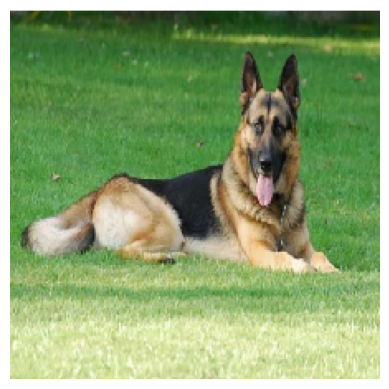

In [9]:
plt.imshow(image.astype('uint8'))
plt.axis('off')
plt.show()